<a href="https://colab.research.google.com/github/Lourarhi-Yahya/Spam_classifier/blob/main/spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importer les bibliothèque**

In [174]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [175]:
import pandas as pd
import sklearn

# **Lire et traitement des Donnees**

In [176]:
data = pd.read_csv("emails.csv")

In [177]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [178]:
data.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [179]:
data.shape

(5346, 3002)

In [180]:
data.dtypes

Email No.      object
the             int64
to              int64
ect             int64
and             int64
               ...   
military      float64
allowing      float64
ff            float64
dry           float64
Prediction    float64
Length: 3002, dtype: object

In [181]:
df_emails = data
valeurs_nulles = df_emails.isnull()
nbr_col = df_emails.isnull().sum()
nbr_col

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      1
allowing      1
ff            1
dry           1
Prediction    1
Length: 3002, dtype: int64

In [182]:
new_df = df_emails.dropna()

In [183]:
target = new_df.iloc[:,3001].values
target

array([0., 0., 0., ..., 1., 1., 0.])

In [184]:
features = new_df.iloc[:,1:3001]
features

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,13,24,6,6,2,102,1,27,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,1,0,0,0,8,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,5,22,0,5,1,51,2,10,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,6,17,1,5,2,57,0,9,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5341,2,2,2,3,0,0,32,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5342,35,27,11,2,6,5,151,4,3,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5343,0,0,1,1,0,0,11,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5344,2,7,1,0,2,1,28,2,0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# **Deviser les donnees**

In [185]:
x_train , x_test, y_train, y_test= train_test_split(features , target, test_size=.2, random_state=0)

# **Naive Bayes Classifier**

In [186]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [187]:
prediction = naive_bayes.predict(x_test)
prediction

array([1., 0., 1., ..., 0., 0., 1.])

In [188]:
nb_erreur = accuracy_score(prediction , y_test)*100
nb_erreur

95.60336763330216

In [189]:
cv_nb = cross_val_score(naive_bayes,x_train, y_train , cv=10)
cv_nb=cv_nb.mean()*100
cv_nb

95.53267744971437

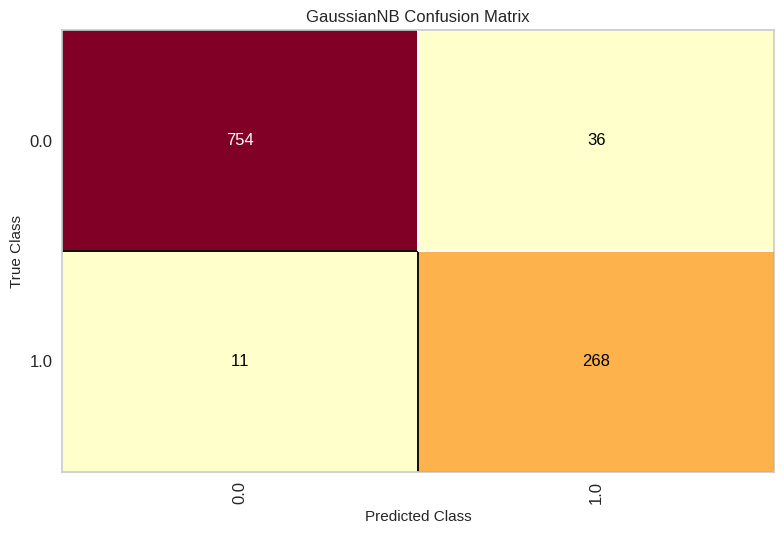

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [190]:
matrix = ConfusionMatrix(GaussianNB())
matrix.fit(x_train, y_train)
matrix.score(x_test, y_test)
matrix.poof()

# **Decision Tree Classifier**

In [191]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [192]:
export_graphviz(tree, out_file = 'tree.dot')

In [193]:
tree_predict= tree.predict(x_test)

In [194]:
tree_erreur = accuracy_score(tree_predict, y_test)*100
tree_predict

array([0., 0., 0., ..., 0., 0., 1.])

In [195]:
cv_tree = cross_val_score(tree,x_train, y_train , cv=10)
cv_tree=cv_tree.mean()*100
cv_tree

93.1949156252052

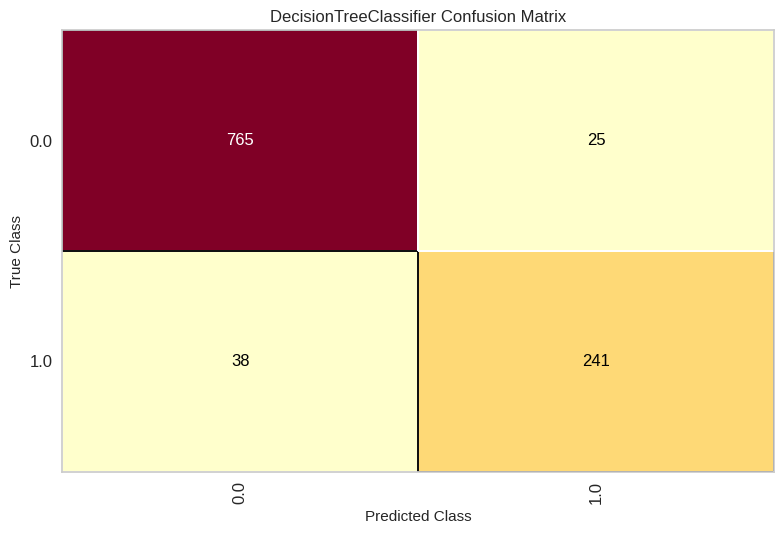

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [196]:
matrix_tree = ConfusionMatrix(DecisionTreeClassifier())
matrix_tree.fit(x_train, y_train)
matrix_tree.score(x_test, y_test)
matrix_tree.poof()

# **Random Forest**

In [197]:
forest = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=0)
forest.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [198]:
forest_predict = forest.predict(x_test)
forest_erreur = accuracy_score(forest_predict, y_test)*100
forest_erreur

98.0355472404116

In [199]:
cv_forest = cross_val_score(forest,x_train, y_train , cv=10)
cv_forest=cv_forest.mean()*100
cv_forest

97.14679682199217

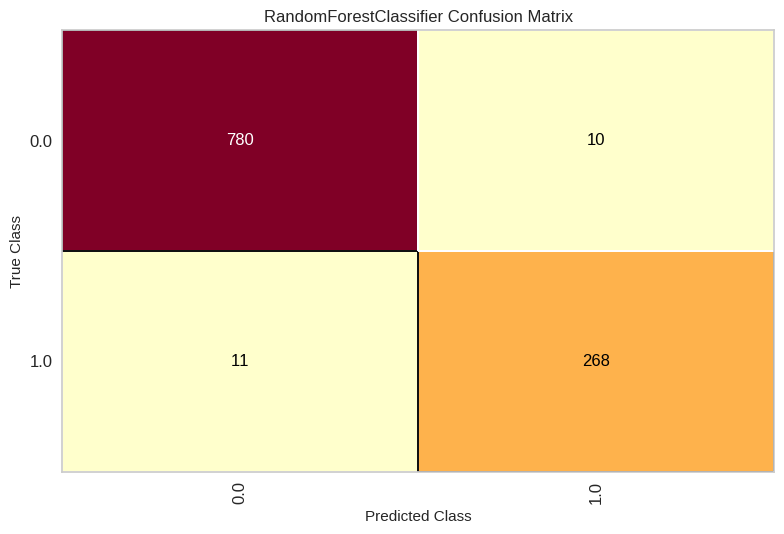

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [200]:
matrix_forest = ConfusionMatrix(RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=0))
matrix_forest.fit(x_train, y_train)
matrix_forest.score(x_test, y_test)
matrix_forest.poof()

# **Logistic Regression**

In [201]:
log = LogisticRegression(max_iter=1000,random_state=0)
log.fit(x_train, y_train)

In [202]:
log_predict = log.predict(x_test)

In [203]:
log_erreur = accuracy_score(log_predict, y_test)*100
log_erreur

97.56782039289055

In [204]:
cv_log = cross_val_score(log,x_train, y_train , cv=10)
cv_log=cv_log.mean()*100
cv_log

96.86614940138763

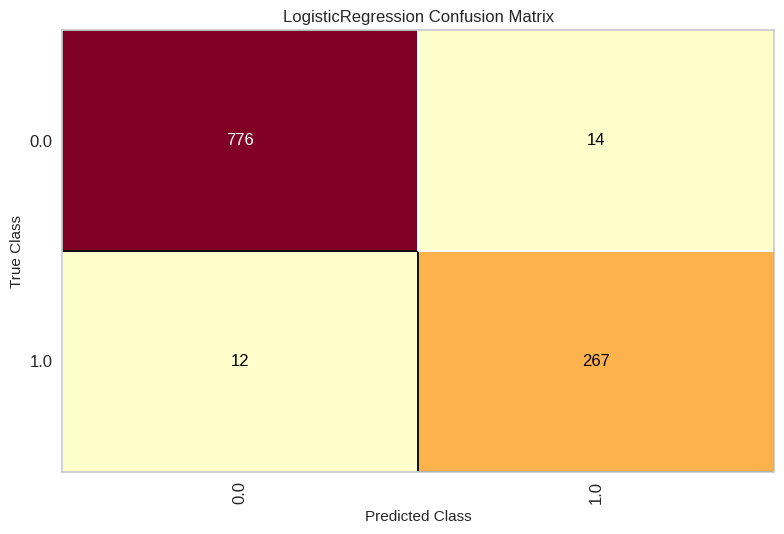

In [ ]:
matrix_log = ConfusionMatrix(LogisticRegression(max_iter=1000,random_state=0))
matrix_log.fit(x_train, y_train)
matrix_log.score(x_test, y_test)
matrix_log.poof()

# **Support Vectors Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

In [207]:
svm = SVC(kernel='linear', random_state=0)
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [208]:
svm_predict = svm.predict(x_test)
svm_erreur = accuracy_score(svm_predict, y_test)*100
svm_erreur

96.53882132834426

In [209]:
cv_svm = cross_val_score(svm, x_train, y_train, cv=10)

In [210]:
cv_svm=cv_svm.mean()*100
cv_svm

95.81403620127382

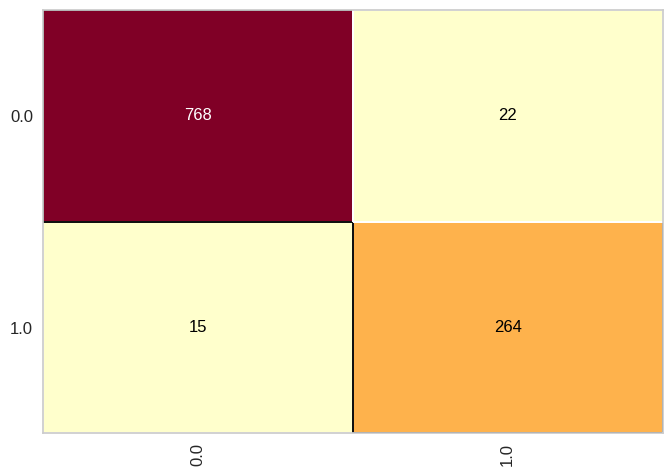

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [211]:
matrix_svm = ConfusionMatrix(SVC(kernel='linear', random_state=0))
matrix_svm.fit(x_train, y_train)
matrix_svm.score(x_test, y_test)
matrix.poof()

# **Analysing the performance of the algorithms**

In [212]:
print("the accuracy of the Naive Bayes Model is {}, and the score of its cross validation is {}".format(nb_erreur, cv_nb))
print("the accuracy of the Desision Tree Model is {}, and the score of its cross validation is {}".format(tree_erreur, cv_tree))
print("the accuracy of the Random Forest Model is {}, and the score of its cross validation is {}".format(forest_erreur, cv_forest))
print("the accuracy of the Logistic Regtression Model is {}, and the score of its cross validation is {}".format(log_erreur, cv_log))
print("the accuracy of the Support Vector Machine is {}, and the score of its cross validation is {}".format(svm_erreur, cv_svm))

the accuracy of the Naive Bayes Model is 95.60336763330216, and the score of its cross validation is 95.53267744971437
the accuracy of the Desision Tree Model is 94.200187090739, and the score of its cross validation is 93.1949156252052
the accuracy of the Random Forest Model is 98.0355472404116, and the score of its cross validation is 97.14679682199217
the accuracy of the Logistic Regtression Model is 97.56782039289055, and the score of its cross validation is 96.86614940138763
the accuracy of the Support Vector Machine is 96.53882132834426, and the score of its cross validation is 95.81403620127382


In [213]:
# mettre  les donnees dans une DataFrame
donnees = {
    'Modèle': ['Naive Bayes', 'Arbre de Décision', 'Random Forest', 'Régression Logistique', 'SVM'],
    'Précision': [nb_erreur, tree_erreur, forest_erreur, log_erreur, svm_erreur],
    'Score de validation croisée': [cv_nb.mean(), cv_tree.mean(), cv_forest.mean(), cv_log.mean(), cv_svm.mean()]
}
df_resultats = pd.DataFrame(donnees)
df_resultats

,Modèle,Précision,Score de validation croisée
0,Naive Bayes,95.603368,95.532677
1,Arbre de Décision,94.200187,93.194916
2,Random Forest,98.035547,97.146797
3,Régression Logistique,97.567820,96.866149
4,SVM,96.538821,95.814036
